In [98]:
import numpy as np
import matplotlib.pyplot as plt

In [99]:
# 확률 : 특정 사건이 발생하는 횟수 / 전체 발생 가능한 경우의 수

# 주사위를 3번 던져 나올 수 있는 모든 경우의 수 : 6*6*6 = 6**3

# 1에서부터 6까지 숫자가 적힌 공이 든 박스에서 3개의 공을 꺼낼 때 나올 수 있는 모든 경우의 수 : 6*5*4
# -- without replacement --> perm, combi

# 1에서부터 6까지 숫자가 적힌 공이 든 박스에서 3개의 공을 꺼내면서 꺼낸 공을 다시 잡아넣고, 섞어 뽑았을 때 나올 수 있는 모든 경우의 수 : 6*6*6
# -- with repacement

In [100]:
def fact_1(n) :
    ret_value = 1
    values = [x for x in range(n+1)]
    for i in values[1:] :
            ret_value = ret_value*i
    return ret_value

def fact_2(n) :
    ret_value = 1
    for i in range(n) :
        ret_value = ret_value*(i+1)
    return ret_value

def fact_3(n) :
    while n>1 :
        ret_value =ret_value*n
        n = n-1
    return ret_value

# recursive, 재귀함수: 자기가 자기 자신을 부르는(call) 함수
def fact_r(n) :
     if n==2 :
          return n  # 탈출 코드(escape code)  / 없을 경우 무한 루프
     return fact_r(n-1)*n   # n! = n*(n-1)!

def fact_np(n) :
     return np.arange(2, n+1).prod()

def perm(n, r) :
     return fact_np(n)/fact_np(n-r)

def combi(n, r) :
     return perm(n,r)/fact_np(r)

assert perm(6,2) == 30
assert perm(6,3) == 120
assert combi(6,2) == 15

In [101]:
# permutation(순열) : 순서 개념 있음  ex> (a,b,c), (b,c,a) 둘은 다른 것!

# 1에서부터 6까지 숫자가 적힌 공이 든 박스에서 3개의 공을 꺼낼 때 나올 수 있는 모든 경우의 수 : 6*5*4
# -- without replacement

# 3개의 숫자를 정렬하는 방법의 개수 : 3 * 2 * 1 
# n개의 숫자를 정렬하는 방법의 개수 : n!
print(fact_np(6))

# 1에서부터 6까지 숫자 중 2개를 정렬하는 방법의 개수
# n = (6*5*4*3*2*1)/(4*3*2*1)
# n = 6
# r = 2
# n! / (n-r)!
# ex> (1,6), (6,1)와 같은 두 가지는 각각의 경우로 카운트 된다

fact_np(6)/fact_np(6-2)

perm(6,2)

720


30.0

In [102]:
# combination(조합)
# 순열에서 구성이 같은 것을 제외, 순서의 개념 x / ex> (1,6) (6,1) --> 같은 것은 1가지의 경우로 카운트 된다
# permutation / r! : 순서는 다르고, 구성이 같은 것을 제외!
# n! / r!*(n-r)!

fact_np(6)/(fact_np(2)*fact_np(6-2))

combi(6,2)

15.0

In [103]:
def count_with_replacement_order(pool, sel_count):  # all
    if sel_count == 1:
        return len(pool), [[x] for x in pool]
    a, b = count_with_replacement_order(pool, sel_count-1)
    r = []
    for x in pool:
        for b_i in b:
            r.append(b_i+[x])
    return len(r), r

In [104]:
count_with_replacement_order(list('abcdef'), 3)

(216,
 [['a', 'a', 'a'],
  ['b', 'a', 'a'],
  ['c', 'a', 'a'],
  ['d', 'a', 'a'],
  ['e', 'a', 'a'],
  ['f', 'a', 'a'],
  ['a', 'b', 'a'],
  ['b', 'b', 'a'],
  ['c', 'b', 'a'],
  ['d', 'b', 'a'],
  ['e', 'b', 'a'],
  ['f', 'b', 'a'],
  ['a', 'c', 'a'],
  ['b', 'c', 'a'],
  ['c', 'c', 'a'],
  ['d', 'c', 'a'],
  ['e', 'c', 'a'],
  ['f', 'c', 'a'],
  ['a', 'd', 'a'],
  ['b', 'd', 'a'],
  ['c', 'd', 'a'],
  ['d', 'd', 'a'],
  ['e', 'd', 'a'],
  ['f', 'd', 'a'],
  ['a', 'e', 'a'],
  ['b', 'e', 'a'],
  ['c', 'e', 'a'],
  ['d', 'e', 'a'],
  ['e', 'e', 'a'],
  ['f', 'e', 'a'],
  ['a', 'f', 'a'],
  ['b', 'f', 'a'],
  ['c', 'f', 'a'],
  ['d', 'f', 'a'],
  ['e', 'f', 'a'],
  ['f', 'f', 'a'],
  ['a', 'a', 'b'],
  ['b', 'a', 'b'],
  ['c', 'a', 'b'],
  ['d', 'a', 'b'],
  ['e', 'a', 'b'],
  ['f', 'a', 'b'],
  ['a', 'b', 'b'],
  ['b', 'b', 'b'],
  ['c', 'b', 'b'],
  ['d', 'b', 'b'],
  ['e', 'b', 'b'],
  ['f', 'b', 'b'],
  ['a', 'c', 'b'],
  ['b', 'c', 'b'],
  ['c', 'c', 'b'],
  ['d', 'c', 'b'],
  ['e'

In [105]:
def perm_pool(pool, r):
    if r == 1:
        return len(pool), [[x] for x in pool]
    ret = []
    for x in pool:
        pool_copy = [y for y in pool]
        pool_copy.remove(x)
        a, b = perm_pool(pool_copy, r-1)
        for b_i in b:
            ret.append(b_i+[x])
    return len(ret), ret

In [106]:
perm_pool(list('abcdef'), 3)

(120,
 [['c', 'b', 'a'],
  ['d', 'b', 'a'],
  ['e', 'b', 'a'],
  ['f', 'b', 'a'],
  ['b', 'c', 'a'],
  ['d', 'c', 'a'],
  ['e', 'c', 'a'],
  ['f', 'c', 'a'],
  ['b', 'd', 'a'],
  ['c', 'd', 'a'],
  ['e', 'd', 'a'],
  ['f', 'd', 'a'],
  ['b', 'e', 'a'],
  ['c', 'e', 'a'],
  ['d', 'e', 'a'],
  ['f', 'e', 'a'],
  ['b', 'f', 'a'],
  ['c', 'f', 'a'],
  ['d', 'f', 'a'],
  ['e', 'f', 'a'],
  ['c', 'a', 'b'],
  ['d', 'a', 'b'],
  ['e', 'a', 'b'],
  ['f', 'a', 'b'],
  ['a', 'c', 'b'],
  ['d', 'c', 'b'],
  ['e', 'c', 'b'],
  ['f', 'c', 'b'],
  ['a', 'd', 'b'],
  ['c', 'd', 'b'],
  ['e', 'd', 'b'],
  ['f', 'd', 'b'],
  ['a', 'e', 'b'],
  ['c', 'e', 'b'],
  ['d', 'e', 'b'],
  ['f', 'e', 'b'],
  ['a', 'f', 'b'],
  ['c', 'f', 'b'],
  ['d', 'f', 'b'],
  ['e', 'f', 'b'],
  ['b', 'a', 'c'],
  ['d', 'a', 'c'],
  ['e', 'a', 'c'],
  ['f', 'a', 'c'],
  ['a', 'b', 'c'],
  ['d', 'b', 'c'],
  ['e', 'b', 'c'],
  ['f', 'b', 'c'],
  ['a', 'd', 'c'],
  ['b', 'd', 'c'],
  ['e', 'd', 'c'],
  ['f', 'd', 'c'],
  ['a'

In [107]:
def combi_pool(pool, r):
    a , b = perm_pool(pool, r)
    r = []
    for b_i in b:
        r.append(set(b_i))
    f = []
    for r_i in r:
        if r_i not in f:
            f.append(r_i)
    return len(f), f

In [108]:
combi_pool(list('abcdef'),3)

(20,
 [{'a', 'b', 'c'},
  {'a', 'b', 'd'},
  {'a', 'b', 'e'},
  {'a', 'b', 'f'},
  {'a', 'c', 'd'},
  {'a', 'c', 'e'},
  {'a', 'c', 'f'},
  {'a', 'd', 'e'},
  {'a', 'd', 'f'},
  {'a', 'e', 'f'},
  {'b', 'c', 'd'},
  {'b', 'c', 'e'},
  {'b', 'c', 'f'},
  {'b', 'd', 'e'},
  {'b', 'd', 'f'},
  {'b', 'e', 'f'},
  {'c', 'd', 'e'},
  {'c', 'd', 'f'},
  {'c', 'e', 'f'},
  {'d', 'e', 'f'}])

In [109]:
# 확률분포
# 동전을 한 번 던져 나올 수 있는 확률의 분포
# 앞 1/2, 뒤 1/2

# 동전을 두 번 던져 나올 수 있는 경우의 확률 분포
# (앞, 앞) (앞, 뒤) (뒤, 앞) (뒤, 뒤)
# 각각의 확률 1/4
# 앞의 값: 0, 뒤의 값: 1이라 할 때의 분포
#  0      1      2      <-- 확률분포 x축 : 확률 변수, 확률 변수가 가질 수 있는 값
#  1/4    1/2    1/4

[[0 0]
 [1 0]
 [0 1]
 [1 1]]
[0 1 2] [1 2 1]


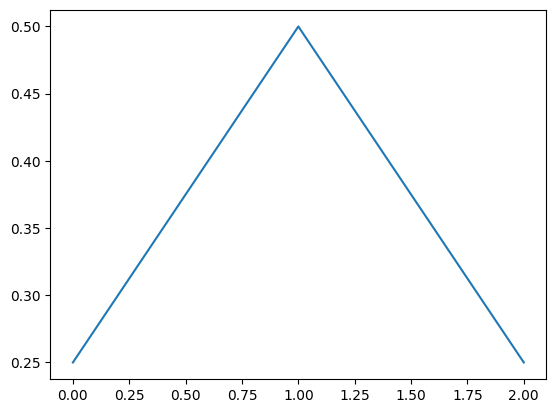

In [111]:
x = count_with_replacement_order([0,1], 2)
x_array = np.array(x[1])
print(x_array)
x_array_sum = np.sum(x_array, axis=1)
val, count = np.unique(x_array_sum, return_counts=True)
print(val,count)

_, axe = plt.subplots()
axe.plot(val, count/x[0])

216
[[1, 1, 1], [2, 1, 1], [3, 1, 1], [4, 1, 1], [5, 1, 1], [6, 1, 1], [1, 2, 1], [2, 2, 1], [3, 2, 1], [4, 2, 1], [5, 2, 1], [6, 2, 1], [1, 3, 1], [2, 3, 1], [3, 3, 1], [4, 3, 1], [5, 3, 1], [6, 3, 1], [1, 4, 1], [2, 4, 1], [3, 4, 1], [4, 4, 1], [5, 4, 1], [6, 4, 1], [1, 5, 1], [2, 5, 1], [3, 5, 1], [4, 5, 1], [5, 5, 1], [6, 5, 1], [1, 6, 1], [2, 6, 1], [3, 6, 1], [4, 6, 1], [5, 6, 1], [6, 6, 1], [1, 1, 2], [2, 1, 2], [3, 1, 2], [4, 1, 2], [5, 1, 2], [6, 1, 2], [1, 2, 2], [2, 2, 2], [3, 2, 2], [4, 2, 2], [5, 2, 2], [6, 2, 2], [1, 3, 2], [2, 3, 2], [3, 3, 2], [4, 3, 2], [5, 3, 2], [6, 3, 2], [1, 4, 2], [2, 4, 2], [3, 4, 2], [4, 4, 2], [5, 4, 2], [6, 4, 2], [1, 5, 2], [2, 5, 2], [3, 5, 2], [4, 5, 2], [5, 5, 2], [6, 5, 2], [1, 6, 2], [2, 6, 2], [3, 6, 2], [4, 6, 2], [5, 6, 2], [6, 6, 2], [1, 1, 3], [2, 1, 3], [3, 1, 3], [4, 1, 3], [5, 1, 3], [6, 1, 3], [1, 2, 3], [2, 2, 3], [3, 2, 3], [4, 2, 3], [5, 2, 3], [6, 2, 3], [1, 3, 3], [2, 3, 3], [3, 3, 3], [4, 3, 3], [5, 3, 3], [6, 3, 3], [1, 4

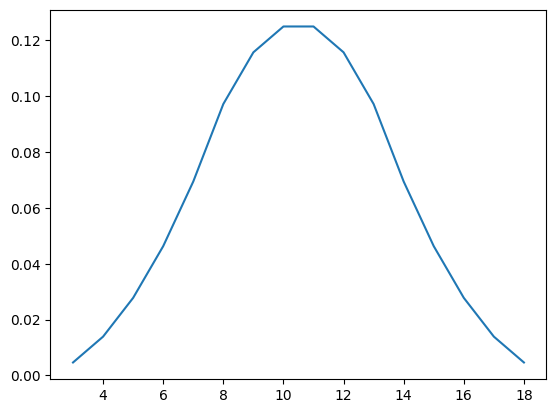

In [115]:
# [주사위를 3번 던져 나온 숫자의 합]의 확률 분포
total_count, counts = count_with_replacement_order([x for x in range(1,7)], 3)
print(total_count)
print(counts)
count_np = np.array(counts)
pass1 = np.sum(count_np, axis=1)
pass2 = np.unique(pass1, return_counts=True)

_,axe = plt.subplots()
axe.plot(pass2[0], pass2[1]/total_count)

1024
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 0, 0, 0, 0, 0], [1, 1, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0, 0, 0, 0, 0], [1, 0, 1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 1, 0, 0, 0, 0, 0], [1, 1, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 1, 0, 0, 0, 0, 0], [1, 0, 1, 0, 1, 0, 0, 0, 0, 0], [0, 1, 1, 0, 1, 0, 0, 0, 0, 0], [1, 1, 1, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 0, 0, 0, 0, 0], [1, 0, 0, 1, 1, 0, 0, 0, 0, 0], [0, 1, 0, 1, 1, 0, 0, 0, 0, 0], [1, 1, 0, 1, 1, 0, 0, 0, 0, 0], [0, 0, 1, 1, 1, 0, 0, 0, 0, 0], [1, 0, 1, 1, 1, 0, 0, 0, 0, 0], [0, 1, 1, 1, 1, 0, 0, 0, 0, 0], [1

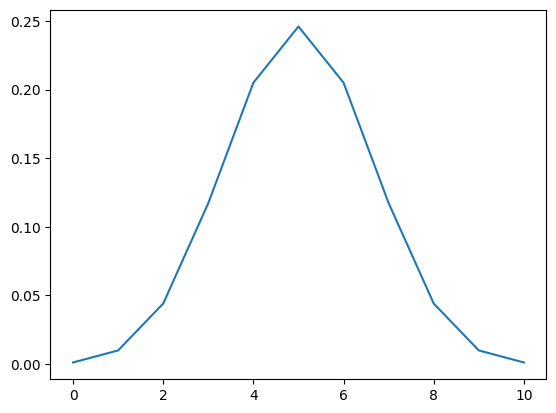

In [121]:
# 앞 0 , 뒤 1 일 때, 동전을 10번 던져 나올 수  있는 합의 확률 분포
total_count, counts = count_with_replacement_order([0, 1], 10)
print(total_count)
print(counts)
count_np_1 = np.array(counts)
pass_1 = np.sum(count_np_1, axis=1)
pass_2 = np.unique(pass_1, return_counts=True)

_, axe = plt.subplots()
axe.plot(pass_2[0], pass_2[1]/total_count)

In [129]:
# 동전을 던져, 앞면이 나오면 100원을 주고, 뒷면이 나오면 100원을 받음
# 상황 : 10번을 던져, 앞면이 8번 나옴
# H1 : 동전이 조작되지 않음     <--- 귀무가설
# H2 : 동전이 조작되었다고 주장 <--- 대립가설
# 유의 수준: 5%에서 결정   / 통계적 가설검정에서 기준이 되는 값

print(pass_2[0])
print(np.sum((pass_2[1]/total_count)[-3:])) #0.0546875 <-- p-value, 귀무가설 수용
# 만약 0.05보다 작았다면 대립가설 수용


[ 0  1  2  3  4  5  6  7  8  9 10]
0.0546875
